In [1]:
import glob
import pandas as pd
import numpy as np
import os

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import re 

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
import joblib

In [3]:
all_file= glob.glob("./songData/*.xlsx")
print(len(all_file))

21


In [4]:
names = []
count = []
clusters = []
data = []

for each in all_file:
    temp = pd.read_excel(each)
    count.append(len(temp))
    names.append(each.split('/')[-1][9:])
    clusters.append(temp['songType'].iloc[0])
    data.append(temp)
# data = pd.concat(data)
# pd.DataFrame(data)
# data = data.sample(frac = 1)
print(names)
print(count)
print(clusters)
print(len(data))

['songType0.xlsx', 'songType1.xlsx', 'songType10.xlsx', 'songType11.xlsx', 'songType12.xlsx', 'songType13.xlsx', 'songType14.xlsx', 'songType15.xlsx', 'songType16.xlsx', 'songType17.xlsx', 'songType18.xlsx', 'songType19.xlsx', 'songType2.xlsx', 'songType20.xlsx', 'songType3.xlsx', 'songType4.xlsx', 'songType5.xlsx', 'songType6.xlsx', 'songType7.xlsx', 'songType8.xlsx', 'songType9.xlsx']
[8, 1027, 43, 62, 127, 711, 58, 2, 5, 780, 11, 46, 13, 9, 762, 8, 58, 92, 207, 19, 57]
[0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2, 20, 3, 4, 5, 6, 7, 8, 9]
21


In [5]:
# import stemmer

from operator import index


valid_bangla_char = set(['া','ি','ী','ু','ূ','ৃ','ে','ৈ','ো','ৌ','ক','খ',
'গ','ঘ','ঙ','চ','ছ','জ','ঝ','ঞ','ট','ঠ','ড','ঢ','ণ','ত','থ','দ','ধ','ন',
'প','ফ','ব','ভ','ম','য','র','ল','শ','ষ','স','হ','ড়','ঢ়','য়','ৎ','ং','ঃ'
'‍ঁ','‍্','‍্য','‍‍্র','‍‍র্ক','‍্ব','৺','ক্ষ','জ্ঞ','অ','আ','ই','ঈ','উ','ঊ','ঋ','এ',
'ঐ','ও','ঔ','অ্যা','্','য়','ঁ','ড়','়','ঃ'])

stop_words = set('')
stop_words_file_lines=open('stop_words.txt','r',encoding='utf-8-sig').readlines()
for word in stop_words_file_lines:
    stop_words.add(word.strip())

def puncuation_removal(sentence):
    words = sentence.split()
    unique_words_per_sentence = set()
    for every_word in words:
        correct_word = ''
        for each_char in every_word:
            if each_char in valid_bangla_char:
                correct_word += each_char
            else:
                # print('eta valid char list e nai ',each_char)
                if unique_words_per_sentence not in stop_words:
                    unique_words_per_sentence.add(correct_word.strip())
                correct_word = ''
        if unique_words_per_sentence not in stop_words:
            unique_words_per_sentence.add(correct_word.strip())
        correct_word = ''

    new_refined_sentence = ' '.join(unique_words_per_sentence)

    return new_refined_sentence



for each_dataframe in data:
    # print(len(each_dataframe['lyrics']))
    for idx in range(len(each_dataframe['lyrics'])):
        each_dataframe['lyrics'][idx] = puncuation_removal(each_dataframe['lyrics'][idx])
        # print(each_dataframe['lyrics'][idx])

# stemmer_obj=stemmer.BanglaStemmer()
#     # word.replace(word,stemmer_obj.stem(word))
#     # print(word,stemmer_obj.stem(word))

data = pd.concat(data)
pd.DataFrame(data)
data = data.sample(frac = 1)

data

C:\Users\Maraz Mia\AppData\Local\Temp\ipykernel_1568\2028748097.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  each_dataframe['lyrics'][idx] = puncuation_removal(each_dataframe['lyrics'][idx])


,Unnamed: 0,lyrics,songType
705,4069,অকাজের খেলি গাঙ্গে গান ছেলের চায়ের বেলায় তুলি...,13
851,3590,যে দিলে সারা তোমারই আছি কাছে বিজনে চলা মতো মো...,1
503,2272,কিশোর চিংড়ি কচি করে খেলে গো গান লঙ্কার সারি ভ...,1
284,1715,দক্ষিণসমীরে তালে ফলাবার ডালে বাতাসে সারা রচনা...,17
338,1773,বেড়ায় থাকে কোন্ যে লজ্জা জীবন কোণে গহনে মোহ ত...,17
...,...,...,...
245,1415,দোলা গানে শুক্লারাতে ধরেছে গান দোতারাটা চুলে ...,13
162,671,যে ফোটাব আশার বিজয়মালা মানুষের গান প্রাণরে গগ...,3
410,2467,মিছিল যদি বাতাসে তো যাও চিরে নয় করেই কানতে শ...,13
517,3052,দুটি তোমারে উদাসি করে পরাজয় আরো মরমে হয় তো এত...,3


In [24]:
# data['lyrics']= data['lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [6]:
X_train, X_test, y_train, y_test =  train_test_split(data['lyrics'], data['songType'], test_size=0.33, random_state=42 )

In [7]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import metrics

total_data_count = len(data)
per_class_counts = []
unique_classes = np.unique(data['songType'].values)
class_count_mean = np.mean(count)

###########################
############### classifier setup ################

from sklearn.naive_bayes import MultinomialNB
text_clf_svm = Pipeline([
    
    ('vect', CountVectorizer(stop_words = list(stop_words),
                            analyzer="word", 
                            lowercase=False,
                            token_pattern="[\S]*",
                            tokenizer=None,
                            ngram_range=(1,3),
                            preprocessor=None)),                 
    ('tfidf', TfidfTransformer()),
    ('clf-svm',MultinomialNB(alpha=0.001)),
                                                                        
])
classifier = text_clf_svm.fit(list(X_train), list(y_train))


cv = ShuffleSplit(n_splits=1, test_size=0.001, random_state=0)
score = cross_val_score(text_clf_svm, list(X_train), list(y_train), cv=cv)

print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
5

predicted = classifier.predict(X_test)

c:\Users\Maraz Mia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens [''] not in stop_words.
  warnings.warn(
c:\Users\Maraz Mia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens [''] not in stop_words.
  warnings.warn(


Cross Accuracy: 0.33 (+/- 0.00)


In [13]:
#joblib.dump(classifier, './Model/nb_model.pickle')

In [8]:
print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print(metrics.classification_report(y_test, predicted))

Cross Accuracy: 0.33 (+/- 0.00)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.46      0.64      0.53       335
           2       0.00      0.00      0.00         7
           3       0.52      0.51      0.51       275
           4       1.00      0.33      0.50         3
           5       0.17      0.04      0.07        23
           6       0.94      0.44      0.60        34
           7       0.85      0.70      0.77        67
           8       0.00      0.00      0.00         7
           9       0.20      0.05      0.08        19
          10       0.00      0.00      0.00        16
          11       0.00      0.00      0.00        19
          12       0.06      0.03      0.04        39
          13       0.55      0.54      0.54       230
          14       0.43      0.18      0.25        17
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00      

c:\Users\Maraz Mia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Maraz Mia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Maraz Mia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [9]:
confusion_matrix = list(metrics.confusion_matrix(y_test, predicted))

<AxesSubplot:>

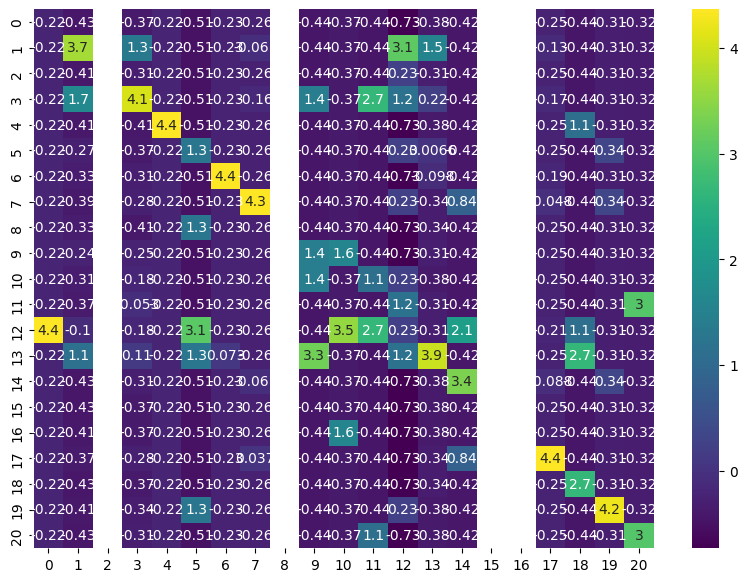

In [10]:
import seaborn as sn
import matplotlib.pyplot as plt
array = confusion_matrix
df_cm = pd.DataFrame(array)
df_norm_col=(df_cm-df_cm.mean())/df_cm.std()
#df_norm_col=df_cm-df_cm.mean()
plt.figure(figsize = (10,7))
sn.heatmap(df_norm_col, annot=True,cmap='viridis')